In [1]:
#NOTES
#Circular plane, top view
#1. Rigid body rotation with 4-5 points
#2. Planet-like rotation with 4-5 points, Solar system as an example
#3. Flat rotation with 4-5 points

## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import time
startTime = time.time()

## Functions

In [3]:
def CalculatePosition(radius,velocity,time,dt):
    """Calculates position of an object around a circle after some time with interval dt."""
    
    # Initial conditions
    theta = 0
    xini = radius * np.cos(theta)
    yini = radius * np.sin(theta)
    t = 0
    
    # Store positions and time
    xposition = [xini]
    yposition = [yini]
    storedtime = [t]
    
    # Calculate positions
    while t < time:
        t += dt
        x = radius * np.cos((velocity/radius)*t)
        y = radius * np.sin((velocity/radius)*t)
        xposition.append(x)
        yposition.append(y)
        storedtime.append(t)
    
    # Make an array
    xposition = np.array(xposition)
    yposition = np.array(yposition)
    storedtime = np.array(storedtime)
    
    return xposition,yposition,storedtime

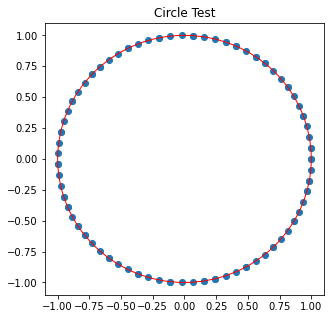

In [4]:
# Test
plt.figure(figsize=(5,5))
plt.title("Circle Test")
circle = plt.Circle((0, 0), 1, color='r', fill=False)
plt.gca().add_patch(circle)
plt.scatter(CalculatePosition(1,10,100,1)[0],CalculatePosition(1,10,100,1)[1], marker="o")
plt.show()

In [5]:
def MultiplePositions(radius,velocity,time,dt):
    """Calculate positions of multiple objects around a circle."""
    
    xmultiple = []
    ymultiple = []

    for i in range(len(radius)):
        x = CalculatePosition(radius[i],velocity[i],time,dt)[0]
        y = CalculatePosition(radius[i],velocity[i],time,dt)[1]
        xmultiple.append(x)
        ymultiple.append(y)

    xmultiple = np.array(xmultiple)
    ymultiple = np.array(ymultiple)
    
    return xmultiple, ymultiple

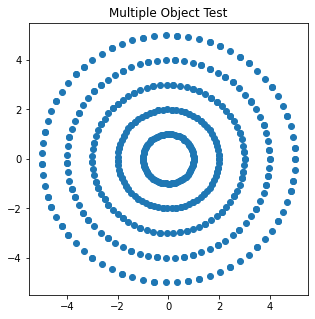

In [6]:
# Test
radiusTEST = np.array([1,2,3,4,5])
velocityTEST = np.array([10,20,30,40,50])

plt.figure(figsize=(5,5))
plt.title("Multiple Object Test")
plt.scatter(MultiplePositions(radiusTEST,velocityTEST,100,1)[0],MultiplePositions(radiusTEST,velocityTEST,100,1)[1], marker="o")
plt.show()

In [7]:
def PlotRotationCurve(radius,velocity,title,
                      xlabel='Radius (km)',ylabel='Velocity (km/s)',
                      xlim=1,
                      ylim=0.1):
    
    # Convert title to string
    title = str(title)
    
    # Plot
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.scatter(radius,velocity,color='purple')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xlim(0,np.max(radius)+xlim)
    plt.ylim(0,np.max(velocity)+ylim)
    plt.show()

## Animation

In [8]:
def MakeAnimation(radius,velocity,time,dt,filename,title,
                 xlim=1,
                 ylim=1):
    
    # Extract x and y positions, and time
    xpositions = MultiplePositions(radius,velocity,time,dt)[0]
    ypositions = MultiplePositions(radius,velocity,time,dt)[1]
    storedtimes = CalculatePosition(radius,velocity,time,dt)[2]
                      
    # Create a movie write object, set frame rate
    writer = ani.FFMpegWriter(fps=25)

    # Create a figure, 8"x8" in size
    fig = plt.figure(figsize=(8,8))    
  
    # Convert filename and title to string
    filename = str(filename)
    title = str(title)

    # Set things up to save frames to a movie:
    #   fig = the figure the writer will record from
    with writer.saving(fig, filename, 100):

    # Loop
        i = 0            # start counter
        for t in storedtimes:
            plt.cla()
            for r in radius:
                    circle = plt.Circle((0, 0), r, color='r', fill=False)
                    plt.gca().add_patch(circle)
            plt.scatter(xpositions[:,i],ypositions[:,i],s=100,color='purple')
            plt.suptitle(title)
            plt.title('{:.1e} seconds'.format(t))
            plt.xlim(-np.max(radius)-xlim,np.max(radius)+xlim)
            plt.ylim(-np.max(radius)-1,np.max(radius)+ylim)
            plt.xlabel('x (km)')
            plt.ylabel('y (km)')
            i += 1
            
            # Save the current plot as a movie frame
            writer.grab_frame()

## Rigid Body (Frisbee) Rotation

In [9]:
radiusRB = np.array([1,2,3,4,5])
velocityRB = np.array([0.1,0.2,0.3,0.4,0.5])

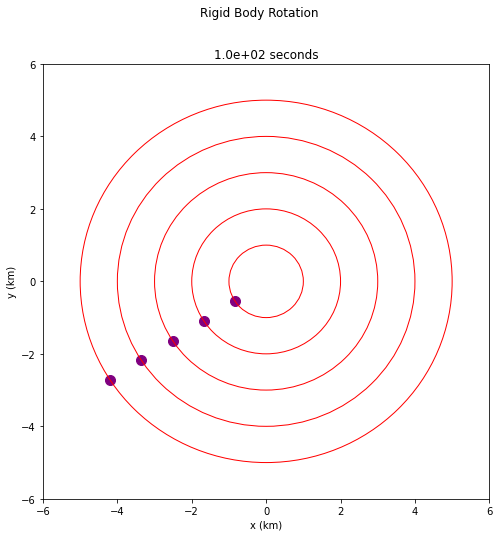

In [10]:
MakeAnimation(radiusRB,velocityRB,100,1,'rigidbody.gif','Rigid Body Rotation')

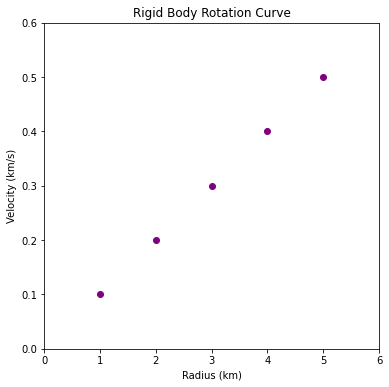

In [11]:
PlotRotationCurve(radiusRB,velocityRB,'Rigid Body Rotation Curve')

In [12]:
# Calculation time
executionTime1 = (time.time() - startTime)
ttt1=executionTime1/60
print(f'Execution time: {ttt1:.2f} minutes')

Execution time: 0.10 minutes


## Planet-like Rotation

In [13]:
# Parameters

G = 6.67408e-11         #Gravitational constant (in m^3 kg^-1 s^-2)
AU = 1.496e11           #Astronomical Unit (in meters)

# Mass (M) in kg
M_Earth = 5.972e24      
M_Sun = 3.3e5*M_Earth
M_Mercury = 0.055*M_Earth
M_Venus = 0.82*M_Earth
M_Mars = 0.11*M_Earth
M_Jupiter = 318*M_Earth
M_Saturn = 95.2*M_Earth
M_Uranus = 14.5*M_Earth
M_Neptune = 17.1*M_Earth

massesSS = np.array([M_Mercury,M_Venus,M_Earth,M_Mars,M_Jupiter,M_Saturn,M_Uranus,M_Neptune])

# Distance (r) in meters
r_Earth = AU
r_Mercury = 0.39*AU 
r_Venus = 0.72*AU
r_Mars = 1.52*AU
r_Jupiter = 5.20*AU
r_Saturn = 9.54*AU
r_Uranus = 19.2*AU
r_Neptune = 30.1*AU

radiusSS = np.array([r_Mercury,r_Venus,r_Earth,r_Mars,r_Jupiter,r_Saturn,r_Uranus,r_Neptune])

# Orbital velocity in m/s
v_Mercury = np.sqrt((G*M_Sun)/r_Mercury)
v_Venus = np.sqrt((G*(M_Sun+M_Mercury))/r_Venus)
v_Earth = np.sqrt((G*(M_Sun+M_Mercury+M_Venus))/r_Earth)
v_Mars = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth))/r_Mars)
v_Jupiter = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars))/r_Jupiter)
v_Saturn = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter))/r_Saturn)
v_Uranus = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn))/r_Uranus)
v_Neptune = np.sqrt((G*(M_Sun+M_Mercury+M_Venus+M_Earth+M_Mars+M_Jupiter+M_Saturn+M_Uranus))/r_Neptune)

velocitySS = np.array([v_Mercury,v_Venus,v_Earth,v_Mars,v_Jupiter,v_Saturn,v_Uranus,v_Neptune])

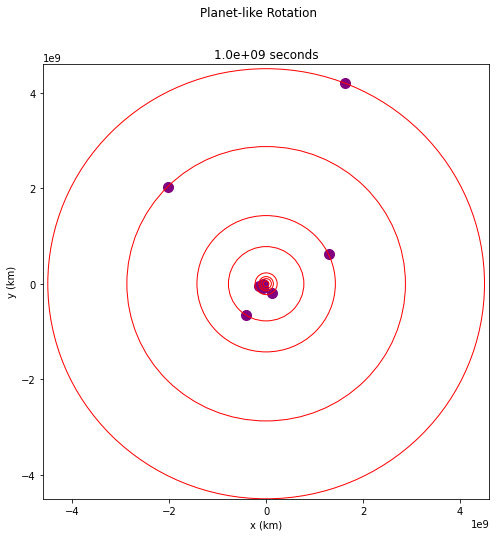

In [14]:
MakeAnimation(1e-3*radiusSS,1e-3*velocitySS,
              1e9,1e7,
              'solarsystem.gif','Planet-like Rotation',
             1e8,1e8)

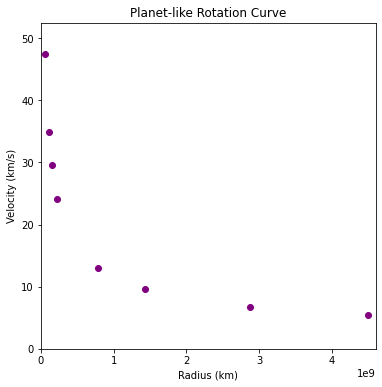

In [15]:
PlotRotationCurve(1e-3*radiusSS,1e-3*velocitySS,
                  'Planet-like Rotation Curve',
                  xlabel='Radius (km)',ylabel='Velocity (km/s)',
                 xlim=1e8,ylim=5)

In [16]:
# Calculation time
executionTime2 = (time.time() - startTime)
ttt2=executionTime2/60
print(f'Execution time: {ttt2:.2f} minutes')

Execution time: 0.20 minutes


## Flat Rotation

In [17]:
radiusFR = np.array([1,2,3,4,5,6,7])
velocityFR = np.array([0.1,0.24,0.29,0.31,0.31,0.31,0.31])

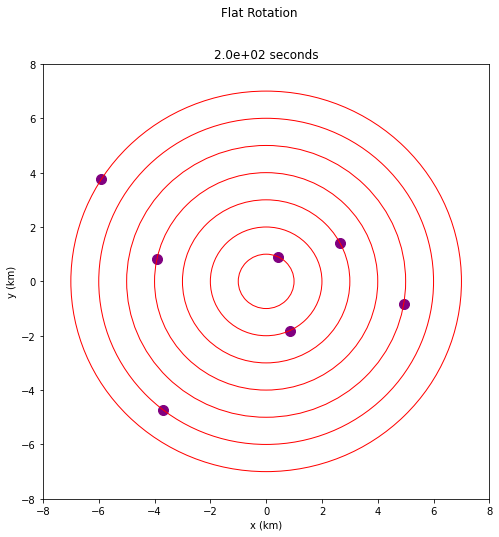

In [18]:
MakeAnimation(radiusFR,velocityFR,200,1,'flatrotation.gif','Flat Rotation')

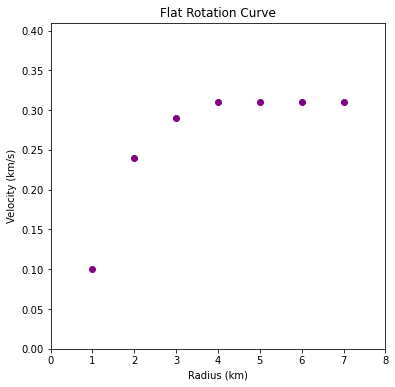

In [19]:
PlotRotationCurve(radiusFR,velocityFR,'Flat Rotation Curve')

In [20]:
# Calculation time
executionTime3 = (time.time() - startTime)
ttt3=executionTime3/60
print(f'Execution time: {ttt3:.2f} minutes')

Execution time: 0.42 minutes
